In [24]:
import pandas as pd



In [42]:
df=pd.read_csv('elnino.csv')

In [26]:

df

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19
...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.8,27.87
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03


In [27]:
import pandas as pd


df.columns = df.columns.str.strip()


df['Date'] = df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)


df['Date'] = pd.to_datetime(df['Date'], format='%y-%m-%d')


df = df.set_index('Date')


df = df.drop(['Year', 'Month', 'Day'], axis=1)


In [28]:
df

,Observation,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
Date,,,,,,,,
1980-03-07,1,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1980-03-08,2,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
1980-03-09,3,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
1980-03-10,4,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
1980-03-11,5,-0.02,-109.46,-4.2,1.5,.,25.3,23.19
...,...,...,...,...,...,...,...,...
1998-06-11,178076,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
1998-06-12,178077,8.96,-140.32,-4.3,-3.3,93.2,25.8,27.87
1998-06-13,178078,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93


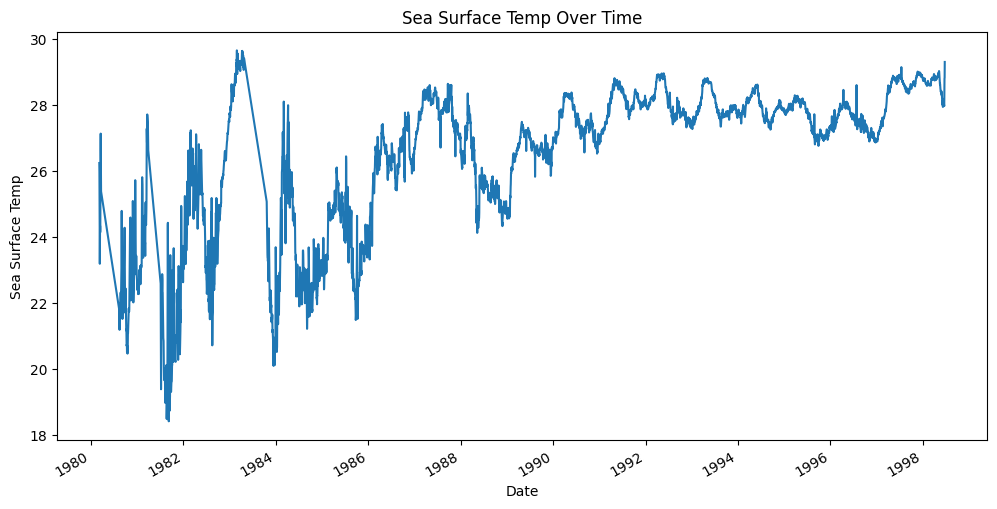

In [32]:
import matplotlib.pyplot as plt


sea_surface_temp = pd.to_numeric(df['Sea Surface Temp'], errors='coerce')
sea_surface_temp = sea_surface_temp.dropna()


sea_surface_temp = sea_surface_temp.groupby(level=0).mean()


sea_surface_temp.plot(figsize=(12, 6), title='Sea Surface Temp Over Time')
plt.xlabel('Date')
plt.ylabel('Sea Surface Temp')
plt.show()


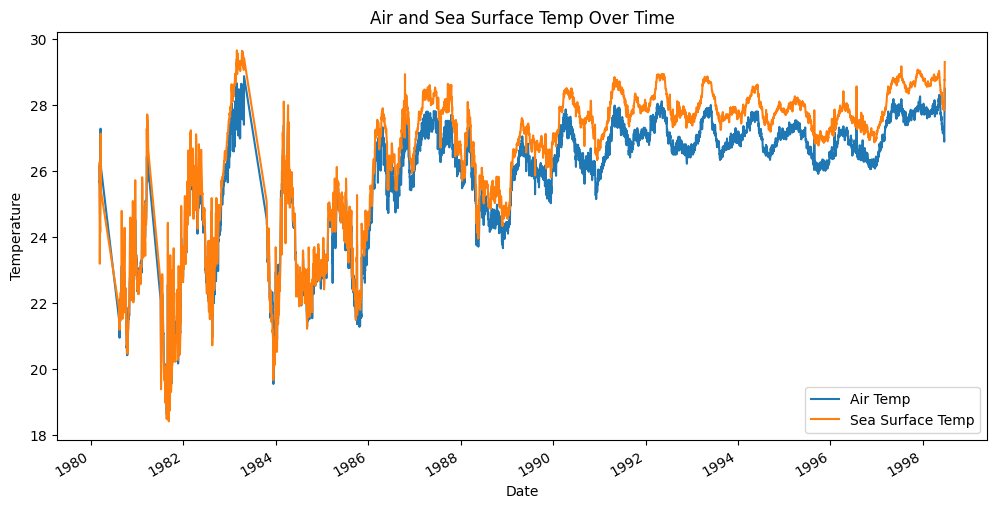

In [33]:

air_and_sea_temp = df[['Air Temp', 'Sea Surface Temp']].apply(pd.to_numeric, errors='coerce')
air_and_sea_temp = air_and_sea_temp.dropna()


air_and_sea_temp = air_and_sea_temp.groupby(level=0).mean()


air_and_sea_temp.plot(figsize=(12, 6), title='Air and Sea Surface Temp Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(['Air Temp', 'Sea Surface Temp'])
plt.show()


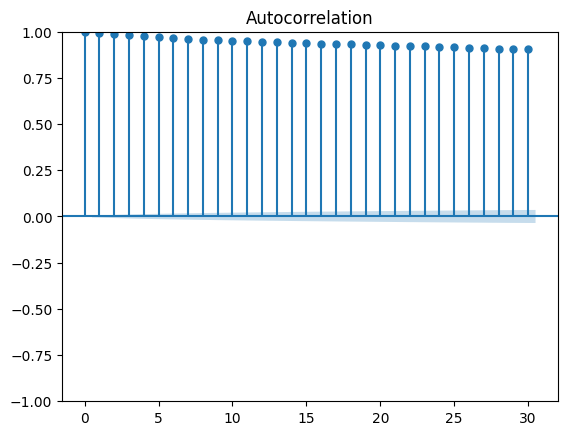

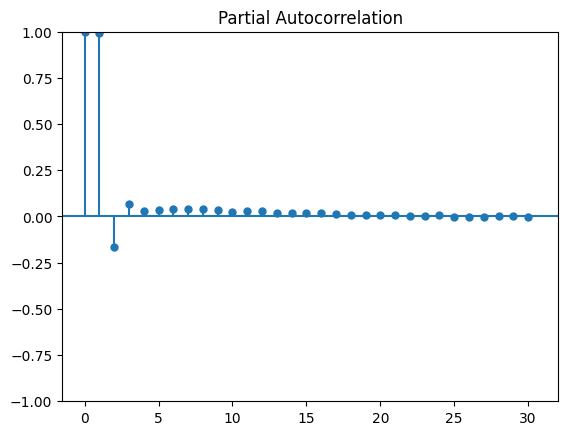

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


sea_surface_temp = pd.to_numeric(df['Sea Surface Temp'], errors='coerce')


sea_surface_temp = sea_surface_temp.dropna()


plot_acf(sea_surface_temp, lags=30)
plot_pacf(sea_surface_temp, lags=30)
plt.show()


In [38]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


p, d, q = (1, 1, 1)


train_size = int(len(sea_surface_temp) * 0.8)
train, test = sea_surface_temp[:train_size], sea_surface_temp[train_size:]


model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()


predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [40]:

mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.4631620752313326
